In [62]:
import numpy as np
import pandas as pd
%pylab inline
%config InlineBackend.figure_formats = ['retina']

import pandas as pd
import seaborn as sns
sns.set()

Populating the interactive namespace from numpy and matplotlib


In [63]:
filepath = "weather.csv"
data = pd.read_csv(filepath)
data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature',
       'Apparent Temperature', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [64]:
data.dtypes

Formatted Date             object
Summary                    object
Precip Type                object
Temperature               float64
Apparent Temperature      float64
Humidity                  float64
Wind Speed (km/h)         float64
Wind Bearing (degrees)      int64
Visibility (km)           float64
Loud Cover                  int64
Pressure (millibars)      float64
Daily Summary              object
dtype: object

In [65]:
col=['Formatted Date','Summary','Precip Type','Daily Summary']
data.drop(col, axis=1, inplace=True)

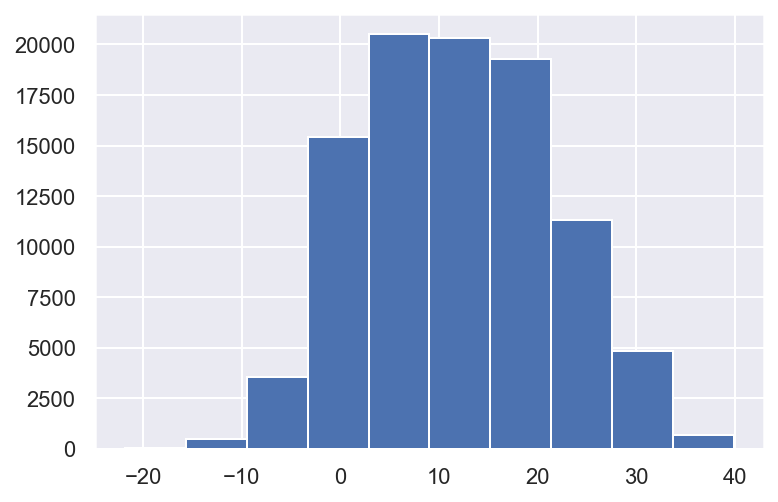

In [66]:
#Verifying If our target is not normally distributed or not (Visual)
data.Temperature.hist();

In [67]:
#Verifying If our target is not normally distributed or not (statistic)
from scipy.stats.mstats import normaltest
normaltest(data.Temperature.values)

NormaltestResult(statistic=2781.3146430045176, pvalue=0.0)

In [68]:
y_col = "Temperature"

X = data.drop(y_col, axis=1)
y = data[y_col]

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=5)

In [71]:
# Standardization
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [75]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
result=lr.predict(X_test)

In [76]:

from sklearn.metrics import r2_score
r2_score(y_test,result)

0.990196261032701

In [77]:
#Lets try doing same linear regression with polynomial transformation

In [79]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2, include_bias=False,)
X = pf.fit_transform(X)

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=5)
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [81]:
lr = LinearRegression()
lr.fit(X_train, y_train)
result=lr.predict(X_test)
r2_score(y_test,result)

0.9967276495926414

In [ ]:
#Lets try doing same linear regression with polynomial transformation and Lasso regularization

In [99]:
from sklearn.linear_model import Lasso
las = Lasso(alpha=0.01)
las.fit(X_train, y_train)
result=las.predict(X_test)
r2_score(y_test,result)

0.9962788671481085

In [ ]:
#Lets try doing same linear regression with polynomial transformation and Ridge regularization

In [100]:
from sklearn.linear_model import Ridge
rid = Ridge(alpha=0.1)
rid.fit(X_train, y_train)
result=rid.predict(X_test)
r2_score(y_test,result)

0.9967276255287426